In [1]:
import numpy as np
import matplotlib.pyplot as plt
from psoclasses.consoptipso import consadawpsoaeq
from psoclasses.consoptipso import consadawpso
#求解问题为极小形
#必须将Aeq,A写成 AX-B<=0或AX-B=0的形式
#the maxv parameter needs to be chosen carefully and affects the results very much
# Too large leads to oscillation, too small is hard to find the optimal value

总耗时：0.2649576663970947s
最优变量:[2.5 2.5]
最优值是:12.500000
总耗时：0.21554899215698242s
最优变量:[2. 3.]
最优值是:12.000000
总耗时：0.2242145538330078s
最优变量:[2.75 2.  ]
最优值是:12.250000


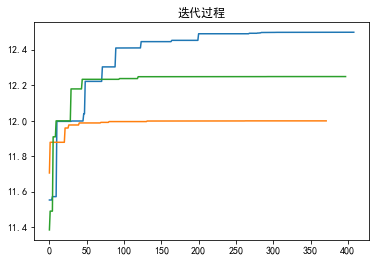

In [33]:
import time
#如果求解最大值必须将函数乘以-1，之后令sovmax=True
upper=[30,30]
lower=[0,0]
isints=[0,0]
def aeqf(X):#不满足约束统一计算，返回的数组是0或满足
    eq1=4*X[:,0]+2*X[:,1]-15
    eq2=X[:,0]+2*X[:,1]-8
    eq3=X[:,0]+X[:,1]-5
    result=np.zeros(X.shape[0])
    for iter in range(X.shape[0]):#如果满足约束,此时所有变量应小于等于0
        if  eq1[iter]<=0 and eq2[iter]<=0 and eq3[iter]<=0:
            result[iter]=np.zeros(1)
        else:#如果满足约束
            result[iter]=np.ones(1)
    
    return result
dim=2
psize=200
iter_num=1000
def fun1s(X):
    z=3*X[:,0]+2*X[:,1]
    return -1*z
pso=consadawpsoaeq(fun1s,lower,upper,dim,psize,isints,aeqf,max_v=2,ifplot=True,sovmax=True)
starttime=time.time()
pso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
pso.printresult()
isints=[1,0]#x is integer
pso=consadawpsoaeq(fun1s,lower,upper,dim,psize,isints,aeqf,max_v=2,ifplot=True,sovmax=True)
starttime=time.time()
pso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
pso.printresult()
isints=[0,1]#y is integer
pso=consadawpsoaeq(fun1s,lower,upper,dim,psize,isints,aeqf,max_v=2,ifplot=True,sovmax=True)
starttime=time.time()
pso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
pso.printresult()

总耗时：0.13327336311340332s
最优变量:[0.78867234 0.40825619]
最优值是:263.895843


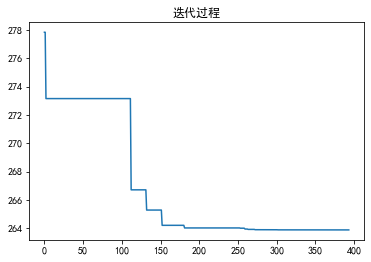

In [36]:
import time
#如果求解最大值必须将函数乘以-1，之后令sovmax=True
def fun1s(X):
    L=100
    x1=X[:,0]
    x2=X[:,1]
    z=(2*np.sqrt(2)*x1+x2)*L
    return z

def aeqf(X):#不满足约束统一计算，返回的数组是0或满足
    P=2
    sigma=2
    x1=X[:,0]
    x2=X[:,1]
    eq1=P*(np.sqrt(2)*x1+x2)/(np.sqrt(2)*(x1**2)+2*x1*x2)-sigma
    eq2=P*(x2)/(np.sqrt(2)*(x1**2)+2*x1*x2)-sigma
    eq3=P*(1)/(np.sqrt(2)*(x2)+x1)-sigma
    result=np.zeros(X.shape[0])
    for iter in range(X.shape[0]):#如果满足约束,此时所有变量应小于等于0
        if  eq1[iter]<=0 and eq2[iter]<=0 and eq3[iter]<=0:
            result[iter]=np.zeros(1)
        else:#如果满足约束
            result[iter]=np.ones(1)
    
    return result
dim=2
psize=100
iter_num=1000
upper=[1,1]
lower=[0.001,0.001]
isints=[0,0]
pso=consadawpsoaeq(fun1s,lower,upper,dim,psize,isints,aeqf,max_v=1,ifplot=True,sovmax=False)
starttime=time.time()
pso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
pso.printresult()
result=pso.getresult()#get x y
resultx=result[0]
#print(aeqf(resultx.reshape(1,resultx.shape[0])))

总耗时：0.6384057998657227s
最优变量:[ 0.60110646  0.29712723 31.14541237 10.        ]
最优值是:863.729823


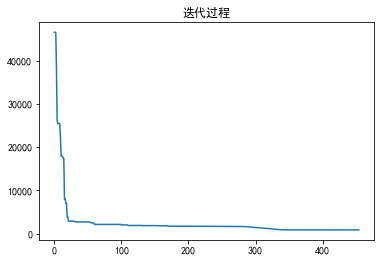

In [27]:
import time
#如果求解最大值必须将函数乘以-1，之后令sovmax=True

def fun1s(X):#minfx
    z=0.6224*X[:,0]*X[:,2]*X[:,3]+1.7781*X[:,1]*(X[:,2]**2)+3.1661*(X[:,0]**2)*X[:,3]+19.84*(X[:,0]**2)*X[:,2]
    return z
def aeqf(X):#不满足约束统一计算，返回的数组是0或满足
    eq1=-1*X[:,0]+0.0193*X[:,2]
    eq2=-1*X[:,1]+0.00954*X[:,2]
    eq3=-1*np.math.pi*(X[:,2]**2)-4*np.math.pi*(X[:,2]**3)/3+129600
    eq4=X[:,3]-240
    result=np.zeros(X.shape[0])
    for iter in range(X.shape[0]):#如果满足约束,此时所有变量应小于等于0
        #judge
        if  eq1[iter]<=0 and eq2[iter]<=0 and eq3[iter]<=0 and eq4[iter]<=0:
            result[iter]=np.zeros(1)#满足条件，对应位置=0
        else:#如果满足约束
            result[iter]=np.ones(1)
    
    return result
dim=4
upper=[100,100,100,100]
lower=[0,0,10,10]
isints=[0,0,0,0]
psize=500
iter_num=1000
pso=consadawpsoaeq(fun1s,lower,upper,dim,psize,isints,aeqf,ifplot=True,sovmax=False)
starttime=time.time()
pso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
pso.printresult()
result=pso.getresult()#get x y
resultx=result[0]
#如果输出不带惩罚，那必然满足条件，带惩罚会输出一个负的（或者正的）巨大值

In [9]:
aeqf(resultx.reshape(1,resultx.shape[0]))

array([0.])

In [8]:
fun1s(resultx.reshape(1,resultx.shape[0]))

array([863.72982303])

总耗时：1.2475001811981201s
最优变量:[6.43571429 0.57428571 0.        ]
最优值是:14.594286


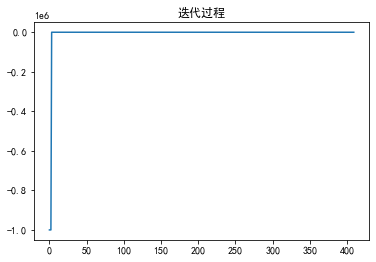

In [66]:
import time
#如果求解最大值必须将函数乘以-1，之后令sovmax=True
def fun1s(X):
    z=2*X[:,0]+3*X[:,1]-5*X[:,2]
    return -z
def aeqf(X):#不满足约束统一计算，返回的数组是0或满足
    eq1=-1*(2*X[:,0]-5*X[:,1]+X[:,2]-10)
    eq2=X[:,0]+3*X[:,1]+X[:,2]-12
    result=np.zeros(X.shape[0])
    for iter in range(X.shape[0]):#如果满足约束,此时所有变量应小于等于0
        if  eq1[iter]<=0 and eq2[iter]<=0:
            result[iter]=np.zeros(1)
        else:#如果满足约束
            result[iter]=np.ones(1)
    return result
def af(X):#有等式约束
    eq1=X[:,0]+X[:,1]+X[:,2]-7
    result=np.zeros(X.shape[0])
    tol=0.01
    #tol为容忍度，不建议太小
    for iter in range(X.shape[0]):#如果满足约束,此时所有变量应等于0
        if  np.abs(eq1[iter])<=tol:
            result[iter]=np.zeros(1)
        else:#如果满足约束
            result[iter]=np.ones(1)
    return result
dim=3
upper=[20,20,20]
lower=[0,0,0]
isints=[0,0,0]
psize=600
iter_num=1000
pso=consadawpso(fun1s,lower,upper,dim,psize,isints,aeqf,af,max_v=3,ifplot=True,sovmax=True)
#如果采用这种方法，max_v需要设置到较大，目前这个问题maxv=2-3较优
#If there is an equality constraint, maxv has to be large
starttime=time.time()
pso.fit()
endtime=time.time()
print(f"总耗时：{endtime-starttime}s")
pso.printresult()
result=pso.getresult()#get x y
#best x[]
#y[]
#可以看到能求出近似解来。
#多运行几次求解，14.59结果